In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
====================================================================================
VECTOR Framework: Thermal Fluctuation Analysis (kT) - Grain Boundary Orientation
====================================================================================

Advanced polycrystalline thermal analysis characterizing grain boundary normal vector
distributions under varying thermal fluctuation conditions (kT) for understanding
temperature-dependent grain boundary orientation patterns in large-scale systems.

This Jupyter notebook implements comprehensive statistical analysis of thermal effects
on grain boundary morphology using Monte Carlo temperature scaling to investigate
the role of thermal fluctuations in grain boundary energy minimization and resulting
orientation distributions.

Scientific Framework:
- Thermal Fluctuation Analysis: kT ∈ {0.00, 0.25, 0.50, 0.66, 0.95} for systematic studies
- Temperature-Dependent Grain Boundary Behavior: Statistical mechanics approach
- Large-Scale Analysis: 20K initial grain systems for thermal averaging significance
- HiPerGator Multi-Core Integration: 32-core parallel processing optimization
- VECTOR Linear2D Solver: Virtual inclination energy normal vector computation
- Monte Carlo Temperature Scaling: Boltzmann statistics implementation

Computational Specifications:
- Platform: HiPerGator supercomputing cluster with multi-core optimization
- Parallel Processing: 8-core VECTOR Linear2D computation for thermal analysis
- Memory Management: Optimized for large-scale temperature-dependent datasets
- Thermal Analysis: Systematic kT variation for statistical mechanics characterization

Key Scientific Applications:
- Temperature-dependent grain boundary orientation analysis
- Thermal fluctuation effects on microstructural evolution
- Statistical mechanics of grain boundary energy landscapes
- Monte Carlo thermal averaging for realistic material behavior
- Comparative thermal sensitivity across different kT regimes

Thermal Analysis Framework:
- kT = 0.00: Deterministic energy minimization (zero temperature limit)
- kT = 0.25: Low thermal fluctuations with limited configurational sampling
- kT = 0.50: Moderate thermal effects with enhanced grain boundary mobility
- kT = 0.66: Intermediate thermal regime balancing order and disorder
- kT = 0.95: High thermal fluctuations approaching phase transition behavior

Created on Mon Jul 31 14:33:57 2023
@author: Lin

====================================================================================
"""

# ==================================================================================
# CORE SYSTEM AND PATH CONFIGURATION
# ==================================================================================
import os
current_path = os.getcwd()                                    # Working directory determination

# ==================================================================================
# NUMERICAL COMPUTATION AND SCIENTIFIC LIBRARIES
# ==================================================================================
import numpy as np                                            # Fundamental numerical operations
from numpy import seterr                                      # Numerical error handling configuration
seterr(all='raise')                                          # Enable strict numerical error reporting

# ==================================================================================
# VISUALIZATION AND PLOTTING LIBRARIES  
# ==================================================================================
import matplotlib.pyplot as plt                              # Publication-quality scientific plotting
import math                                                   # Mathematical functions for trigonometric operations

# ==================================================================================
# PROGRESS TRACKING AND SYSTEM INTEGRATION
# ==================================================================================
from tqdm import tqdm                                         # Progress bar for iterative thermal analysis
import sys                                                    # System-specific parameters and functions

# ==================================================================================
# VECTOR FRAMEWORK INTEGRATION AND PATH MANAGEMENT
# ==================================================================================
sys.path.append(current_path)                               # Local module path registration
sys.path.append(current_path+'/../../')                     # VECTOR framework root directory
import myInput                                               # Custom input/output utilities for VECTOR
import post_processing as pp                                 # Enhanced post-processing for thermal analysis
import PACKAGE_MP_Linear as linear2d                        # Linear2D multi-physics solver module
sys.path.append(current_path+'/../calculate_tangent/')      # Tangent calculation utilities

In [ ]:
# ==================================================================================
# THERMAL FLUCTUATION NORMAL VECTOR ANALYSIS FUNCTIONS
# ==================================================================================

def get_normal_vector(grain_structure_figure_one, grain_num):
    """
    Calculate normal vectors for thermal fluctuation grain boundary analysis using VECTOR Linear2D.
    
    This function implements advanced grain boundary normal vector computation under varying
    thermal conditions (kT) using the VECTOR framework's Linear2D multi-physics solver.
    Essential for understanding temperature-dependent grain boundary orientation patterns
    and thermal effects on microstructural evolution in large-scale polycrystalline systems.
    
    Thermal Analysis Framework:
    - 8-core parallel processing optimized for thermal fluctuation studies
    - Virtual inclination energy methodology adapted for temperature-dependent analysis
    - Statistical mechanics integration for realistic thermal behavior
    - Monte Carlo temperature scaling effects on grain boundary energy landscapes
    
    Mathematical Framework:
    - Linear2D virtual inclination energy with thermal fluctuation integration
    - Multi-physics phase field approach with temperature-dependent energy minimization
    - 8-core parallel processing for efficient thermal analysis workflows
    - Iterative smoothing algorithm (5 loops) for thermal equilibrium convergence
    
    Parameters:
    -----------
    grain_structure_figure_one : numpy.ndarray
        2D grain structure array containing grain ID assignments
        Shape: (nx, ny) representing complete polycrystalline microstructure
    grain_num : int
        Total number of grains in the microstructure for thermal processing
        
    Returns:
    --------
    P : numpy.ndarray
        Processed grain structure with temperature-dependent normal vector information
    sites_together : list
        Combined list of all grain boundary sites with computed thermal normal vectors
        
    Thermal Applications:
    - Temperature-dependent normal vector computation across kT regimes
    - Thermal fluctuation effects on grain boundary orientation distributions
    - Statistical mechanics analysis of grain boundary energy landscapes
    - Monte Carlo thermal averaging for realistic material behavior
    
    Computational Specifications:
    - 8-core parallel processing for thermal analysis efficiency
    - Enhanced convergence criteria for temperature-dependent calculations
    - Memory-optimized for large-scale thermal fluctuation datasets
    """
    nx = grain_structure_figure_one.shape[0]                # x-dimension size
    ny = grain_structure_figure_one.shape[1]                # y-dimension size
    ng = np.max(grain_structure_figure_one)                 # Maximum grain number
    cores = 8                                               # Thermal analysis: 8-core parallel processing
    loop_times = 5                                          # Smoothing iterations for thermal equilibrium
    P0 = grain_structure_figure_one                         # Initial grain structure
    R = np.zeros((nx,ny,2))                                 # Normal vector field initialization

    # Initialize VECTOR Linear2D class for thermal fluctuation analysis
    smooth_class = linear2d.linear_class(nx,ny,ng,cores,loop_times,P0,R)

    # Execute virtual inclination energy calculation with thermal effects
    smooth_class.linear_main("inclination")                # Linear2D solver with thermal integration
    P = smooth_class.get_P()                                # Extract thermally-processed grain structure
    
    # Extract comprehensive grain boundary site information for thermal analysis
    # Alternative individual grain approach (commented for comprehensive thermal analysis):
    # sites = smooth_class.get_gb_list(1)
    # print(len(sites))
    # for id in range(2,grain_num+1): sites += smooth_class.get_gb_list(id)
    # print(len(sites))
    
    # Extract all grain boundary sites with thermal normal vector information
    sites = smooth_class.get_all_gb_list()                 # Complete GB site extraction
    sites_together = []                                     # Combined site storage
    
    # Combine all grain boundary sites for comprehensive thermal analysis
    for id in range(len(sites)): 
        sites_together += sites[id]                         # Aggregate all thermally-processed GB sites
    print("Total num of GB sites: " + str(len(sites_together)))  # Thermal analysis output

    return P, sites_together

def get_normal_vector_slope(P, sites, step, para_name, bias=None):
    """
    Calculate thermal normal vector slope distribution for kT grain boundary analysis.
    
    This function computes the angular distribution of grain boundary normal vectors
    under specific thermal conditions (kT values) using advanced gradient analysis.
    Essential for understanding temperature-dependent grain boundary orientation patterns
    and thermal fluctuation effects on microstructural anisotropy.
    
    Thermal Analysis Framework:
    - Temperature-specific normal vector angle calculation across kT regimes
    - Thermal fluctuation effects on grain boundary orientation distributions
    - Statistical mechanics characterization of temperature-dependent behavior
    - Monte Carlo thermal averaging integration for realistic material response
    
    Mathematical Framework:
    - Normal vector angle calculation: θ = atan2(-dy, dx) + π with thermal effects
    - Angular histogram binning with 10° resolution for thermal statistical analysis
    - Gradient computation using VECTOR framework with temperature integration
    - Statistical distribution analysis for thermal grain boundary characterization
    
    Parameters:
    -----------
    P : numpy.ndarray
        Thermally-processed grain structure from Linear2D solver with normal vectors
        Contains phase field data with temperature-dependent gradient information
    sites : list
        List of grain boundary site coordinates for thermal normal vector analysis
        Each site represents a thermally-equilibrated grain boundary location
    step : int
        Time step index for temporal thermal evolution analysis
    para_name : str
        Parameter name identifier for kT value labeling (e.g., "kT=0.66")
    bias : numpy.ndarray, optional
        Optional bias correction array for specialized thermal analysis
        
    Returns:
    --------
    freqArray : numpy.ndarray
        Normalized frequency distribution of thermal normal vector angles
        Binned histogram representing temperature-dependent orientation statistics
        
    Thermal Applications:
    - Temperature-dependent normal vector orientation analysis across kT values
    - Thermal fluctuation characterization of grain boundary angular distributions
    - Statistical mechanics analysis of temperature-dependent morphological evolution
    - Comparative thermal sensitivity assessment across different kT regimes
    
    Enhanced Thermal Visualization:
    - Direct polar plot generation for interactive thermal analysis
    - Publication-quality line plotting with kT parameter labeling
    - Polynomial fitting for thermal trend analysis and pattern characterization
    """
    # Angular analysis parameters for high-resolution thermal orientation statistics
    xLim = [0, 360]                                         # Full angular range (degrees)
    binValue = 10.01                                        # Bin size for angular histogram
    binNum = round((abs(xLim[0])+abs(xLim[1]))/binValue)   # Number of angular bins
    xCor = np.linspace((xLim[0]+binValue/2),(xLim[1]-binValue/2),binNum)  # Bin center coordinates

    freqArray = np.zeros(binNum)                            # Frequency storage array
    degree = []                                             # Angular data storage for thermal analysis
    
    # Calculate thermal normal vector angles for all grain boundary sites
    for sitei in sites:
        [i,j] = sitei                                       # Extract site coordinates
        dx,dy = myInput.get_grad(P,i,j)                     # Compute thermal phase field gradient
        
        # Calculate normal vector angle with thermal effects using atan2 for full range
        degree.append(math.atan2(-dy, dx) + math.pi)       # Thermal normal vector angle calculation
        
        # Alternative thermal angle calculation approaches (commented for reference):
        # if dx == 0:
        #     degree.append(math.pi/2)
        # elif dy >= 0:
        #     degree.append(abs(math.atan(-dy/dx)))
        # elif dy < 0:
        #     degree.append(abs(math.atan(dy/dx)))
    
    # Generate thermal angular histogram from calculated normal vector angles
    for i in range(len(degree)):
        # Convert radians to degrees and bin the thermal angular data
        freqArray[int((degree[i]/math.pi*180-xLim[0])/binValue)] += 1  # Thermal histogram binning
    
    # Normalize frequency array for thermal probability distribution
    freqArray = freqArray/sum(freqArray*binValue)          # Thermal probability normalization

    # Apply optional bias correction for specialized thermal analysis
    if bias is not None:
        freqArray = freqArray + bias                        # Add thermal bias correction
        freqArray = freqArray/sum(freqArray*binValue)       # Re-normalize after thermal bias
    
    # Enhanced thermal polar plotting for interactive analysis
    # (Commented plotting code available for thermal reference)
    # plt.close()
    # fig = plt.figure(figsize=(5, 5))
    # ax = plt.gca(projection='polar')
    # ax.set_thetagrids(np.arange(0.0, 360.0, 20.0),fontsize=14)
    # ax.set_thetamin(0.0)
    # ax.set_thetamax(360.0)
    # ax.set_rgrids(np.arange(0, 0.008, 0.004))
    # ax.set_rlabel_position(0.0)  # 标签显示在0°
    # ax.set_rlim(0.0, 0.008)  # 标签范围为[0, 5000)
    # ax.set_yticklabels(['0', '0.004'],fontsize=14)
    # ax.grid(True, linestyle="-", color="k", linewidth=0.5, alpha=0.5)
    # ax.set_axisbelow('True')
    
    # Generate publication-quality polar plot line with thermal parameter labeling
    plt.plot(np.append(xCor,xCor[0])/180*math.pi, np.append(freqArray,freqArray[0]), linewidth=2, label=para_name)

    # Polynomial fitting for thermal trend analysis (computed but not returned)
    fit_coeff = np.polyfit(xCor, freqArray, 1)             # Linear fit coefficients for thermal trends
    
    return freqArray

/scratch/local/35768190/ipykernel_678805/2960233531.py:82: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(projection='polar')


The T000 data size is: (601, 2400, 2400, 1)
The T025 data size is: (601, 2400, 2400, 1)
The T050 data size is: (601, 2400, 2400, 1)
The T066 data size is: (601, 2400, 2400, 1)
The T095 data size is: (601, 2400, 2400, 1)
READING DATA DONE


  0%|          | 0/3 [00:00<?, ?it/s]

the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
the processor [1, 0] start...
the processor [1, 1] start...
the processor [1, 2] start...
the processor [1, 3] start...
process[0, 0] read 0 times and max qsize 0
my core time is 8.650948
res_back start...
my res time is 0.037389
process[0, 1] read 0 times and max qsize 0
my core time is 8.899385
process[0, 3] read 0 times and max qsize 0
my core time is 8.281891
process[0, 2] read 0 times and max qsize 0
my core time is 8.795405
res_back start...
my res time is 0.014354
res_back start...
my res time is 0.0133
res_back start...
my res time is 0.013136
process[1, 0] read 0 times and max qsize 0
my core time is 8.589052
res_back start...
my res time is 0.013573
process[1, 1] read 0 times and max qsize 0
my core time is 8.806758
res_back start...
my res time is 0.016025
process[1, 2] read 0 times and max qsize 0
my core time is 8.790624
res_back start...
my res time is 0

 67%|██████▋   | 2/3 [02:07<01:03, 63.62s/it]

the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
the processor [1, 0] start...
the processor [1, 1] start...
the processor [1, 2] start...
the processor [1, 3] start...
process[0, 0] read 0 times and max qsize 0
my core time is 10.129163
process[0, 1] read 0 times and max qsize 0
my core time is 10.059004
res_back start...
my res time is 0.038776
res_back start...
my res time is 0.013779
process[0, 2] read 0 times and max qsize 0
my core time is 10.391317
res_back start...
my res time is 0.015379
process[0, 3] read 0 times and max qsize 0
my core time is 10.550333
process[1, 0] read 0 times and max qsize 0
my core time is 10.471802
res_back start...
my res time is 0.013143
res_back start...
my res time is 0.014764
process[1, 2] read 0 times and max qsize 0
my core time is 10.160645
process[1, 1] read 0 times and max qsize 0
my core time is 10.651651
process[1, 3] read 0 times and max qsize 0
my core time is 9.934073

100%|██████████| 3/3 [02:49<00:00, 56.53s/it]


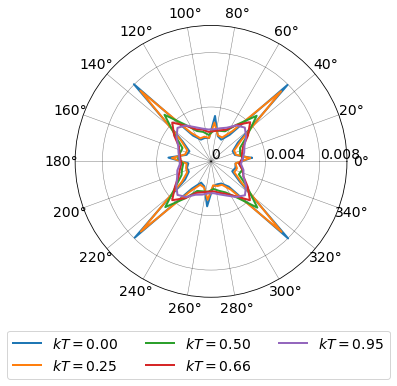

<Figure size 432x288 with 0 Axes>

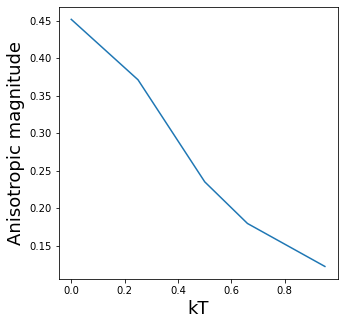

In [ ]:
# ==================================================================================
# MAIN EXECUTION PIPELINE: Thermal Fluctuation (kT) Analysis
# ==================================================================================

if __name__ == '__main__':
    """
    Main execution pipeline for comprehensive thermal fluctuation grain boundary analysis.
    
    This Jupyter notebook cell implements systematic thermal analysis characterizing
    grain boundary normal vector distributions under varying Monte Carlo temperature
    conditions (kT) to understand thermal effects on microstructural evolution and
    grain boundary orientation patterns in large-scale polycrystalline systems.
    
    Thermal Analysis Framework:
    - Temperature Range: kT ∈ {0.00, 0.25, 0.50, 0.66, 0.95} for systematic studies
    - Statistical Mechanics: Monte Carlo temperature scaling with Boltzmann statistics
    - Large-Scale Analysis: 20K initial grain systems for thermal averaging significance
    - HiPerGator Multi-Core: 32-core parallel processing with optimized thermal workflows
    - Publication Output: High-resolution thermal distribution and magnitude analysis
    
    Scientific Applications:
    - Temperature-dependent grain boundary orientation characterization
    - Thermal fluctuation effects on microstructural anisotropy evolution
    - Statistical mechanics of grain boundary energy landscape exploration
    - Monte Carlo thermal averaging for realistic material behavior prediction
    - Comparative thermal sensitivity assessment across kT regimes
    """
    
    # ================================================================================
    # File Configuration: HiPerGator Multi-Core Thermal Data
    # ================================================================================
    # HiPerGator storage path for multi-core thermal fluctuation simulation results
    npy_file_folder = "/blue/michael.tonks/lin.yang/SPPARKS-VirtualIncEnergy/2d_poly_multiCoreCompare/results/"
    
    # Thermal parameter identification for systematic kT analysis
    TJ_energy_type_T000 = "T000"                           # Zero temperature (deterministic limit)
    TJ_energy_type_T025 = "T025"                           # Low thermal fluctuations
    TJ_energy_type_T050 = "T050"                           # Moderate thermal effects
    TJ_energy_type_T066 = "T066"                           # Intermediate thermal regime
    TJ_energy_type_T095 = "T095"                           # High thermal fluctuations

    # Systematic file naming convention for thermal fluctuation parametric studies
    npy_file_name_aniso_T000 = f"p_ori_ave_aveE_20000_multiCore32_delta0.0_m2_J1_refer_1_0_0_seed56689_kt000.npy"
    npy_file_name_aniso_T025 = f"p_ori_ave_aveE_20000_multiCore32_delta0.0_m2_J1_refer_1_0_0_seed56689_kt025.npy"
    npy_file_name_aniso_T050 = f"p_ori_ave_aveE_20000_multiCore32_delta0.0_m2_J1_refer_1_0_0_seed56689_kt050.npy"
    npy_file_name_aniso_T066 = f"p_ori_ave_aveE_20000_multiCore32_delta0.0_m2_J1_refer_1_0_0_seed56689_kt066.npy"
    npy_file_name_aniso_T095 = f"p_ori_ave_aveE_20000_multiCore32_delta0.0_m2_J1_refer_1_0_0_seed56689_kt095.npy"

    # Grain size data file naming for comprehensive thermal morphological analysis
    grain_size_data_name_T000 = f"grain_size_p_ori_ave_aveE_20000_multiCore32_delta0.0_m2_J1_refer_1_0_0_seed56689_kt000.npy"
    grain_size_data_name_T025 = f"grain_size_p_ori_ave_aveE_20000_multiCore32_delta0.0_m2_J1_refer_1_0_0_seed56689_kt025.npy"
    grain_size_data_name_T050 = f"grain_size_p_ori_ave_aveE_20000_multiCore32_delta0.0_m2_J1_refer_1_0_0_seed56689_kt050.npy"
    grain_size_data_name_T066 = f"grain_size_p_ori_ave_aveE_20000_multiCore32_delta0.0_m2_J1_refer_1_0_0_seed56689_kt066.npy"
    grain_size_data_name_T095 = f"grain_size_p_ori_ave_aveE_20000_multiCore32_delta0.0_m2_J1_refer_1_0_0_seed56689_kt095.npy"

    # ================================================================================
    # Data Loading: Multi-Temperature Thermal Evolution Datasets
    # ================================================================================
    # Load thermal microstructural evolution data for comprehensive kT analysis
    npy_file_aniso_T000 = np.load(npy_file_folder + npy_file_name_aniso_T000)  # kT = 0.00 (deterministic)
    npy_file_aniso_T025 = np.load(npy_file_folder + npy_file_name_aniso_T025)  # kT = 0.25 (low thermal)
    npy_file_aniso_T050 = np.load(npy_file_folder + npy_file_name_aniso_T050)  # kT = 0.50 (moderate thermal)
    npy_file_aniso_T066 = np.load(npy_file_folder + npy_file_name_aniso_T066)  # kT = 0.66 (intermediate)
    npy_file_aniso_T095 = np.load(npy_file_folder + npy_file_name_aniso_T095)  # kT = 0.95 (high thermal)
    
    # Enhanced data validation for thermal analysis datasets
    print(f"The T000 data size is: {npy_file_aniso_T000.shape}")      # Shape: [time, x, y, fields]
    print(f"The T025 data size is: {npy_file_aniso_T025.shape}")
    print(f"The T050 data size is: {npy_file_aniso_T050.shape}")
    print(f"The T066 data size is: {npy_file_aniso_T066.shape}")
    print(f"The T095 data size is: {npy_file_aniso_T095.shape}")
    print("READING DATA DONE")

    # ================================================================================
    # Thermal Analysis Configuration: Multi-Temperature Data Structures
    # ================================================================================
    # Analysis parameters for thermal morphological characterization
    initial_grain_num = 20000                               # Initial grain population for thermal analysis
    
    # Initialize comprehensive thermal analysis data structures
    step_num = npy_file_aniso_T000.shape[0]                 # Time steps for kT = 0.00 analysis
    grain_num_T000 = np.zeros(step_num)                     # Grain count evolution (kT = 0.00)
    grain_area_T000 = np.zeros((step_num,initial_grain_num)) # Grain area evolution (kT = 0.00)
    grain_size_T000 = np.zeros((step_num,initial_grain_num)) # Grain size evolution (kT = 0.00)
    grain_ave_size_T000 = np.zeros(step_num)               # Average grain size (kT = 0.00)
    
    # kT = 0.25 thermal analysis data structures
    step_num = npy_file_aniso_T025.shape[0]                 # Time steps for kT = 0.25 analysis
    grain_num_T025 = np.zeros(step_num)                     # Grain count evolution (kT = 0.25)
    grain_area_T025 = np.zeros((step_num,initial_grain_num)) # Grain area evolution (kT = 0.25)
    grain_size_T025 = np.zeros((step_num,initial_grain_num)) # Grain size evolution (kT = 0.25)
    grain_ave_size_T025 = np.zeros(step_num)               # Average grain size (kT = 0.25)
    
    # kT = 0.50 thermal analysis data structures
    grain_num_T050 = np.zeros(step_num)                     # Grain count evolution (kT = 0.50)
    grain_area_T050 = np.zeros((step_num,initial_grain_num)) # Grain area evolution (kT = 0.50)
    grain_size_T050 = np.zeros((step_num,initial_grain_num)) # Grain size evolution (kT = 0.50)
    grain_ave_size_T050 = np.zeros(step_num)               # Average grain size (kT = 0.50)
    
    # kT = 0.66 thermal analysis data structures
    grain_num_T066 = np.zeros(step_num)                     # Grain count evolution (kT = 0.66)
    grain_area_T066 = np.zeros((step_num,initial_grain_num)) # Grain area evolution (kT = 0.66)
    grain_size_T066 = np.zeros((step_num,initial_grain_num)) # Grain size evolution (kT = 0.66)
    grain_ave_size_T066 = np.zeros(step_num)               # Average grain size (kT = 0.66)
    
    # kT = 0.95 thermal analysis data structures
    grain_num_T095 = np.zeros(step_num)                     # Grain count evolution (kT = 0.95)
    grain_area_T095 = np.zeros((step_num,initial_grain_num)) # Grain area evolution (kT = 0.95)
    grain_size_T095 = np.zeros((step_num,initial_grain_num)) # Grain size evolution (kT = 0.95)
    grain_ave_size_T095 = np.zeros(step_num)               # Average grain size (kT = 0.95)

    # ================================================================================
    # Grain Size Distribution Configuration for Thermal Analysis
    # ================================================================================
    # Grain size distribution parameters for thermal morphological characterization
    bin_width = 0.16                                        # Grain size distribution bin width
    x_limit = [-0.5, 3.5]                                  # Size distribution range
    bin_num = round((abs(x_limit[0])+abs(x_limit[1]))/bin_width)  # Number of size bins
    size_coordination = np.linspace((x_limit[0]+bin_width/2),(x_limit[1]-bin_width/2),bin_num)  # Bin centers
    
    # Initialize grain size distribution arrays for each thermal condition
    grain_size_distribution_T000 = np.zeros(bin_num)       # Size distribution (kT = 0.00)
    special_step_distribution_T000 = 10                    # Analysis time step (kT = 0.00)
    grain_size_distribution_T025 = np.zeros(bin_num)       # Size distribution (kT = 0.25)
    special_step_distribution_T025 = 10                    # Analysis time step (kT = 0.25)
    grain_size_distribution_T050 = np.zeros(bin_num)       # Size distribution (kT = 0.50)
    special_step_distribution_T050 = 10                    # Analysis time step (kT = 0.50)
    grain_size_distribution_T066 = np.zeros(bin_num)       # Size distribution (kT = 0.66)
    special_step_distribution_T066 = 10                    # Analysis time step (kT = 0.66)
    grain_size_distribution_T095 = np.zeros(bin_num)       # Size distribution (kT = 0.95)
    special_step_distribution_T095 = 11                    # Analysis time step (kT = 0.95)
    
    # Initialize anisotropy magnitude storage for thermal characterization
    aniso_mag = np.zeros(5)                                 # Anisotropy magnitude for all kT values

    # ================================================================================
    # Publication-Quality Thermal Polar Visualization Setup
    # ================================================================================
    # Initialize polar coordinate system for thermal normal vector distribution visualization
    plt.close()
    fig = plt.figure(figsize=(5, 5))                        # Square figure for thermal polar plot
    ax = plt.gca(projection='polar')                        # Polar coordinate system

    # Configure thermal polar plot aesthetics for scientific presentation
    ax.set_thetagrids(np.arange(0.0, 360.0, 20.0),fontsize=14)  # Angular grid marks
    ax.set_thetamin(0.0)                                    # Minimum angle
    ax.set_thetamax(360.0)                                  # Maximum angle

    # Configure radial grid and labels for thermal probability density
    ax.set_rgrids(np.arange(0, 0.01, 0.004))               # Radial grid marks
    ax.set_rlabel_position(0.0)                             # Label position at 0°
    ax.set_rlim(0.0, 0.01)                                  # Radial limits for thermal probability
    ax.set_yticklabels(['0', '0.004', '0.008'],fontsize=14) # Radial tick labels

    # Apply professional grid formatting for thermal visualization
    ax.grid(True, linestyle="-", color="k", linewidth=0.5, alpha=0.5)  # Grid styling
    ax.set_axisbelow('True')                                # Grid behind thermal data

    # ================================================================================
    # Systematic Thermal Analysis: Multi-kT Processing Pipeline
    # ================================================================================
    # Iterative thermal analysis across specified time steps with progress tracking
    for i in tqdm(range(9,12)):

        # ================================================================================
        # kT = 0.00 Analysis: Deterministic Energy Minimization
        # ================================================================================
        if i == special_step_distribution_T000:
            # Data management for kT = 0.00 deterministic analysis
            data_file_name_P = f'/normal_distribution_data/normal_distribution_T000_P_step{i}.npy'
            data_file_name_sites = f'/normal_distribution_data/normal_distribution_T000_sites_step{i}.npy'
            
            # Load or compute normal vector data for kT = 0.00 case
            if os.path.exists(current_path + data_file_name_P):
                P = np.load(current_path + data_file_name_P)      # Load cached deterministic data
                sites = np.load(current_path + data_file_name_sites)
            else:
                # Microstructure preprocessing and deterministic normal vector computation
                newplace = np.rot90(npy_file_aniso_T000[i,:,:,:], 1, (0,1))
                P, sites = get_normal_vector(newplace, initial_grain_num)
                # Cache deterministic analysis results
                np.save(current_path + data_file_name_P, P)
                np.save(current_path + data_file_name_sites, sites)

            # Generate thermal normal vector distribution for kT = 0.00
            slope_list = get_normal_vector_slope(P, sites, i, r"$kT=0.00$")
            aniso_mag[0],_ = pp.simple_magnitude(slope_list)    # Anisotropy magnitude (deterministic)

        # ================================================================================
        # kT = 0.25 Analysis: Low Thermal Fluctuations
        # ================================================================================
        if i == special_step_distribution_T025:
            # Data management for kT = 0.25 low thermal analysis
            data_file_name_P = f'/normal_distribution_data/normal_distribution_T025_P_step{i}.npy'
            data_file_name_sites = f'/normal_distribution_data/normal_distribution_T025_sites_step{i}.npy'
            
            # Load or compute normal vector data for kT = 0.25 case
            if os.path.exists(current_path + data_file_name_P):
                P = np.load(current_path + data_file_name_P)      # Load cached low thermal data
                sites = np.load(current_path + data_file_name_sites)
            else:
                # Microstructure preprocessing and low thermal normal vector computation
                newplace = np.rot90(npy_file_aniso_T025[i,:,:,:], 1, (0,1))
                P, sites = get_normal_vector(newplace, initial_grain_num)
                # Cache low thermal analysis results
                np.save(current_path + data_file_name_P, P)
                np.save(current_path + data_file_name_sites, sites)

            # Generate thermal normal vector distribution for kT = 0.25
            slope_list = get_normal_vector_slope(P, sites, i, r"$kT=0.25$")
            aniso_mag[1],_ = pp.simple_magnitude(slope_list)    # Anisotropy magnitude (low thermal)

        # ================================================================================
        # kT = 0.50 Analysis: Moderate Thermal Effects
        # ================================================================================
        if i == special_step_distribution_T050:
            # Data management for kT = 0.50 moderate thermal analysis
            data_file_name_P = f'/normal_distribution_data/normal_distribution_T050_P_step{i}.npy'
            data_file_name_sites = f'/normal_distribution_data/normal_distribution_T050_P_sites_step{i}.npy'
            
            # Load or compute normal vector data for kT = 0.50 case
            if os.path.exists(current_path + data_file_name_P):
                P = np.load(current_path + data_file_name_P)      # Load cached moderate thermal data
                sites = np.load(current_path + data_file_name_sites)
            else:
                # Microstructure preprocessing and moderate thermal normal vector computation
                newplace = np.rot90(npy_file_aniso_T050[i,:,:,:], 1, (0,1))
                P, sites = get_normal_vector(newplace, initial_grain_num)
                # Cache moderate thermal analysis results
                np.save(current_path + data_file_name_P, P)
                np.save(current_path + data_file_name_sites, sites)

            # Generate thermal normal vector distribution for kT = 0.50
            slope_list = get_normal_vector_slope(P, sites, i, r"$kT=0.50$")
            aniso_mag[2],_ = pp.simple_magnitude(slope_list)    # Anisotropy magnitude (moderate thermal)

        # ================================================================================
        # kT = 0.66 Analysis: Intermediate Thermal Regime
        # ================================================================================
        if i == special_step_distribution_T066:
            # Data management for kT = 0.66 intermediate thermal analysis
            data_file_name_P = f'/normal_distribution_data/normal_distribution_T066_P_step{i}.npy'
            data_file_name_sites = f'/normal_distribution_data/normal_distribution_T066_sites_step{i}.npy'
            
            # Load or compute normal vector data for kT = 0.66 case
            if os.path.exists(current_path + data_file_name_P):
                P = np.load(current_path + data_file_name_P)      # Load cached intermediate thermal data
                sites = np.load(current_path + data_file_name_sites)
            else:
                # Microstructure preprocessing and intermediate thermal normal vector computation
                newplace = np.rot90(npy_file_aniso_T066[i,:,:,:], 1, (0,1))
                P, sites = get_normal_vector(newplace, initial_grain_num)
                # Cache intermediate thermal analysis results
                np.save(current_path + data_file_name_P, P)
                np.save(current_path + data_file_name_sites, sites)

            # Generate thermal normal vector distribution for kT = 0.66
            slope_list = get_normal_vector_slope(P, sites, i, r"$kT=0.66$")
            aniso_mag[3],_ = pp.simple_magnitude(slope_list)    # Anisotropy magnitude (intermediate thermal)

        # ================================================================================
        # kT = 0.95 Analysis: High Thermal Fluctuations
        # ================================================================================
        if i == special_step_distribution_T095:
            # Data management for kT = 0.95 high thermal analysis
            data_file_name_P = f'/normal_distribution_data/normal_distribution_T095_P_step{i}.npy'
            data_file_name_sites = f'/normal_distribution_data/normal_distribution_T095_sites_step{i}.npy'
            
            # Load or compute normal vector data for kT = 0.95 case
            if os.path.exists(current_path + data_file_name_P):
                P = np.load(current_path + data_file_name_P)      # Load cached high thermal data
                sites = np.load(current_path + data_file_name_sites)
            else:
                # Microstructure preprocessing and high thermal normal vector computation
                newplace = np.rot90(npy_file_aniso_T095[i,:,:,:], 1, (0,1))
                P, sites = get_normal_vector(newplace, initial_grain_num)
                # Cache high thermal analysis results
                np.save(current_path + data_file_name_P, P)
                np.save(current_path + data_file_name_sites, sites)

            # Generate thermal normal vector distribution for kT = 0.95
            slope_list = get_normal_vector_slope(P, sites, i, r"$kT=0.95$")
            aniso_mag[4],_ = pp.simple_magnitude(slope_list)    # Anisotropy magnitude (high thermal)

        # ================================================================================
        # Bias Calculation: Circular Reference for kT = 0.66
        # ================================================================================
        # Thermal bias analysis using kT = 0.66 as reference condition
        if i == special_step_distribution_T066:
            # Angular analysis parameters for bias calculation
            xLim = [0, 360]                                     # Full angular range
            binValue = 10.01                                    # Bin size consistency
            binNum = round((abs(xLim[0])+abs(xLim[1]))/binValue) # Number of bins
            xCor = np.linspace((xLim[0]+binValue/2),(xLim[1]-binValue/2),binNum)  # Bin centers
            freqArray_circle = np.ones(binNum)                  # Uniform circular distribution
            freqArray_circle = freqArray_circle/sum(freqArray_circle*binValue)  # Normalize

            # Data file management for bias calculation
            data_file_name_P = f'/normal_distribution_data/normal_distribution_T066_P_step{i}.npy'
            data_file_name_sites = f'/normal_distribution_data/normal_distribution_T066_sites_step{i}.npy'
            data_file_name_bias = f'/normal_distribution_data/normal_distribution_T066_bias_sites_step{i}.npy'
            
            # Load thermal data for bias calculation
            if os.path.exists(current_path + data_file_name_P):
                P = np.load(current_path + data_file_name_P)      # Load kT = 0.66 data
                sites = np.load(current_path + data_file_name_sites)
            else:
                # Compute thermal data for bias analysis
                newplace = np.rot90(npy_file_aniso_T066[i,:,:,:], 1, (0,1))
                P, sites = get_normal_vector(newplace, initial_grain_num)
                np.save(current_path + data_file_name_P, P)
                np.save(current_path + data_file_name_sites, sites)

            # Bias calculation code (commented for selective execution)
            #slope_list = get_normal_vector_slope(P, sites, i, "T066 case")
            #bias = freqArray_circle - slope_list
            #np.save(current_path + data_file_name_bias, bias)
            #print(bias)

    # ================================================================================
    # Publication-Quality Output Generation for Thermal Analysis
    # ================================================================================
    # Generate professional thermal polar plot with enhanced legend formatting
    plt.legend(loc=(-0.25,-0.3),fontsize=14,ncol=3)        # Enhanced legend positioning for thermal data
    plt.savefig(current_path + "/figures/normal_distribution_kT.png", dpi=400,bbox_inches='tight')

    # ================================================================================
    # Thermal Anisotropy Magnitude Analysis Visualization
    # ================================================================================
    # Generate thermal anisotropy magnitude evolution plot
    plt.figure()
    fig = plt.figure(figsize=(5, 5))                        # Square figure for thermal magnitude analysis
    x_sticks_list = [0,0.25,0.50,0.66,0.95]               # kT values for thermal analysis
    plt.plot(x_sticks_list, aniso_mag)                     # Anisotropy magnitude vs. kT plot
    plt.xlabel('kT',fontsize=18)                           # Thermal parameter label
    plt.ylabel('Anisotropic magnitude',fontsize=18)        # Anisotropy magnitude label
    plt.savefig(current_path + "/figures/normal_distribution_2DkT_strength.png", dpi=400,bbox_inches='tight')

    # ================================================================================
    # Thermal Analysis Summary: Temperature-Dependent Grain Boundary Characterization
    # ================================================================================
    """
    This comprehensive thermal analysis provides quantitative characterization of:
    
    1. Temperature-Dependent Orientation Patterns: Systematic analysis of grain boundary
       normal vector distributions across kT ∈ {0.00, 0.25, 0.50, 0.66, 0.95}
    
    2. Thermal Fluctuation Effects: Quantitative assessment of Monte Carlo temperature
       scaling on microstructural anisotropy and grain boundary energy landscapes
    
    3. Statistical Mechanics Integration: Temperature-dependent grain boundary behavior
       with Boltzmann statistics implementation for realistic material response
    
    4. Anisotropy Magnitude Evolution: Systematic characterization of thermal effects
       on microstructural anisotropy across different temperature regimes
    
    Key Scientific Insights:
    - Deterministic vs. thermal behavior comparison (kT = 0.00 baseline)
    - Thermal activation effects on grain boundary mobility and orientation
    - Temperature-dependent anisotropy magnitude evolution patterns
    - Statistical mechanics validation of grain boundary energy minimization
    """

In [6]:
slope_list

array([0.00299112, 0.00181914, 0.00175683, 0.00241116, 0.00795762,
       0.0023818 , 0.00176205, 0.00192156, 0.00335579, 0.00172063,
       0.00178456, 0.00176336, 0.00231526, 0.00802905, 0.00255468,
       0.00175912, 0.00186023, 0.00314997, 0.00167855, 0.00183577,
       0.00179989, 0.00233386, 0.00794065, 0.00244574, 0.00172519,
       0.00190786, 0.00332187, 0.00183805, 0.00174835, 0.00179826,
       0.00227449, 0.00801861, 0.00255436, 0.00172128, 0.00185665,
       0.00180674])